In [67]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## Generate toy data set

In [68]:
# generate a few spiral lines
r = np.tile(np.r_[0:1:100j],3)
t = np.r_[0:np.pi*4:300j] + np.random.rand(300)
x_train = np.c_[r*np.cos(t), r*np.sin(t)]
y_train = np.arange(3).repeat(100)

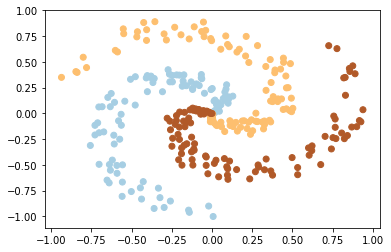

In [69]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Createa Losgistic Regression model

In [23]:
model = nn.Linear(2,3)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Define a prediction function

In [24]:
def predict(m,X):
    if isinstance(X, np.ndarray):
        X = torch.from_numpy(X.astype(np.float32))
        return torch.max(m(X),1)[1]

In [ ]:
Define a helper function to visualize the decision boundary

In [31]:
def plot_decision_boundary(x_train, y_train, model):
    x1_min, x2_min = x_train.min(0) - 0.5
    x1_max, x2_max = x_train.max(0) + 0.5
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    y_pred = predict(model, np.c_[x1.ravel(), x2.ravel()])
    plt.pcolormesh(x1,x2,y_pred.data.numpy().reshape(x1.shape), cmap=plt.cm.Paired)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
    plt.show()

## Train the model

Loss: 0.8554398417472839 at epoch 1


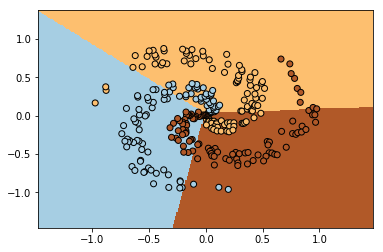

Loss: 0.8509972095489502 at epoch 1001


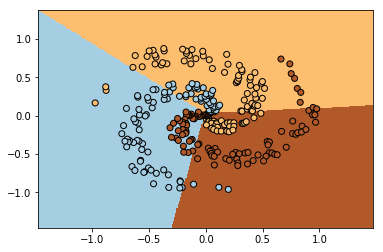

Loss: 0.8468907475471497 at epoch 2001


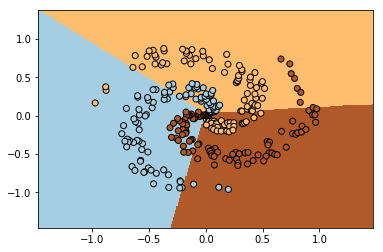

Loss: 0.8430894613265991 at epoch 3001


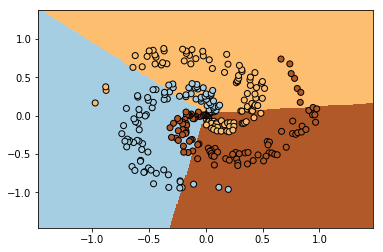

Loss: 0.8395655155181885 at epoch 4001


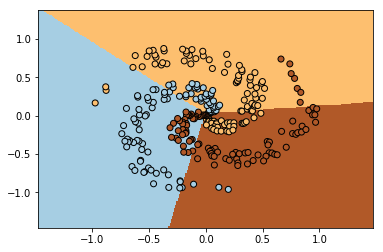

Loss: 0.8362942337989807 at epoch 5001


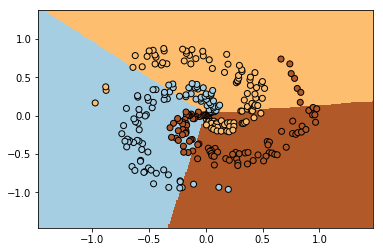

Loss: 0.8332538604736328 at epoch 6001


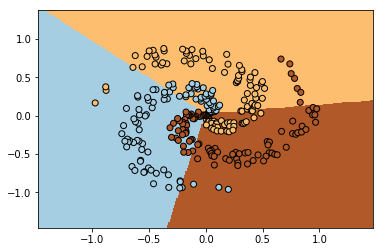

Loss: 0.8304243683815002 at epoch 7001


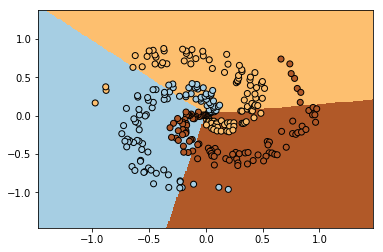

Loss: 0.827786922454834 at epoch 8001


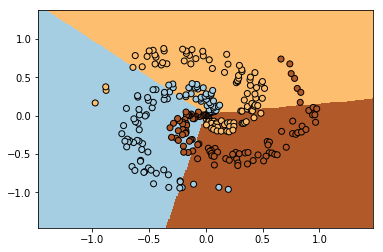

Loss: 0.8253266215324402 at epoch 9001


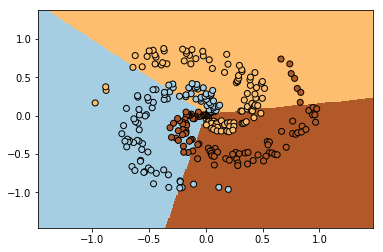

Loss: 0.8230283260345459 at epoch 10001


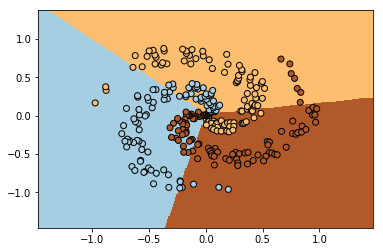

Loss: 0.820879340171814 at epoch 11001


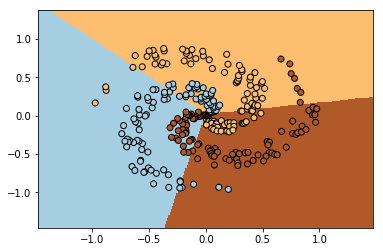

Loss: 0.8188682794570923 at epoch 12001


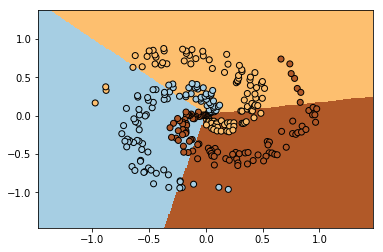

Loss: 0.816983699798584 at epoch 13001


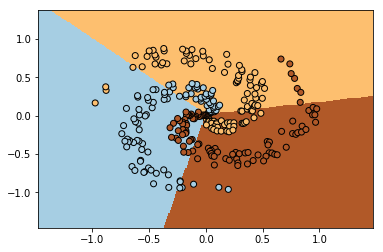

Loss: 0.8152162432670593 at epoch 14001


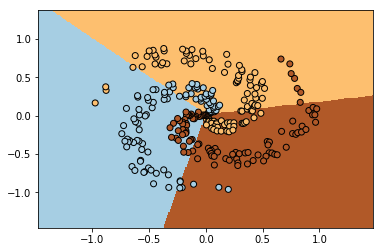

Loss: 0.8135572075843811 at epoch 15001


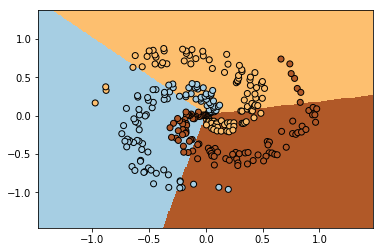

Loss: 0.8119983673095703 at epoch 16001


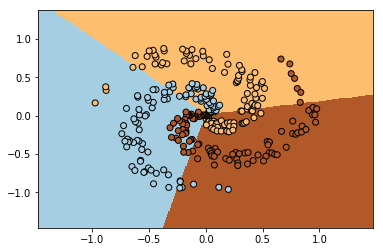

Loss: 0.8105327486991882 at epoch 17001


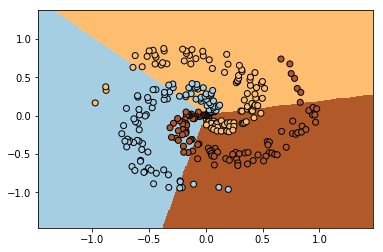

Loss: 0.8091530799865723 at epoch 18001


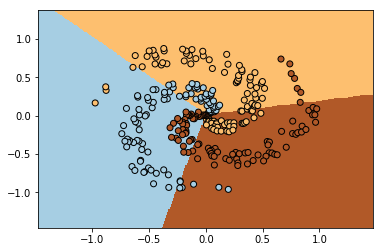

Loss: 0.8078539967536926 at epoch 19001


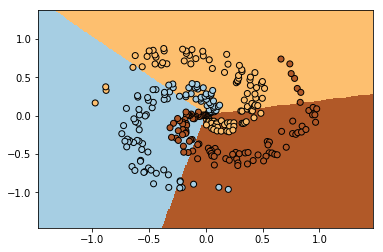

In [32]:
for epoch in range(1, 20001):
    y_pred_score = model(torch.from_numpy(x_train.astype(np.float32)))
    optimizer.zero_grad()
    loss = loss_fn(y_pred_score, torch.from_numpy(y_train.astype(np.int64)))
    loss.backward()
    optimizer.step()
    if epoch%1000==1:
        print(f'Loss: {loss} at epoch {epoch}')
        plot_decision_boundary(x_train, y_train, model)

In [88]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [89]:
model = NeuralNet(2,1024,3)

In [90]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)  

Epoch [1/10000], Step [0], Loss: 1.1532


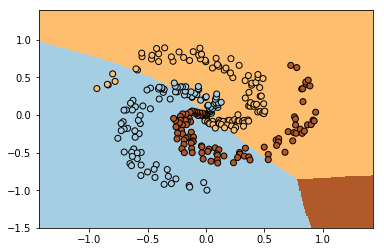

Epoch [1001/10000], Step [1000], Loss: 0.0234


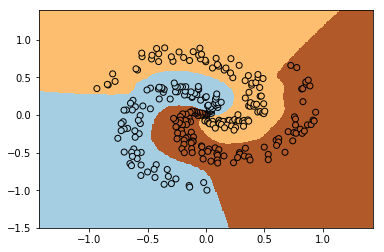

Epoch [2001/10000], Step [2000], Loss: 0.0124


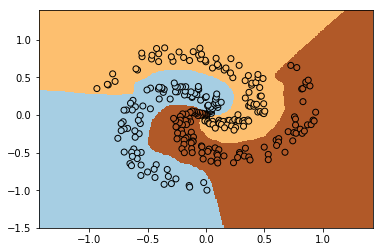

Epoch [3001/10000], Step [3000], Loss: 0.0114


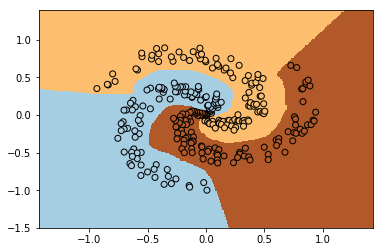

Epoch [4001/10000], Step [4000], Loss: 0.0111


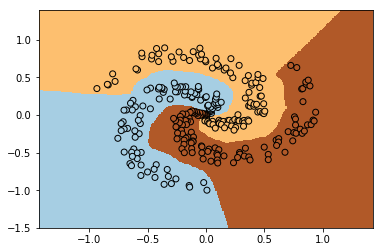

Epoch [5001/10000], Step [5000], Loss: 0.0111


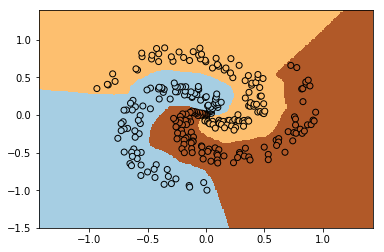

Epoch [6001/10000], Step [6000], Loss: 0.0110


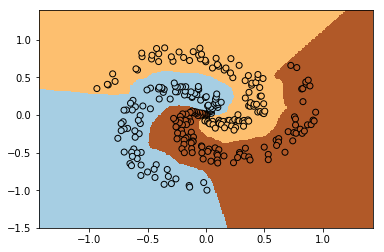

Epoch [7001/10000], Step [7000], Loss: 0.0111


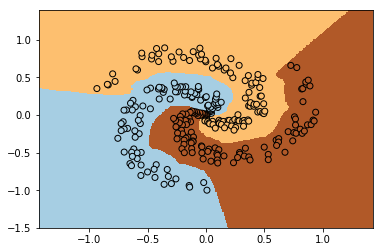

Epoch [8001/10000], Step [8000], Loss: 0.0111


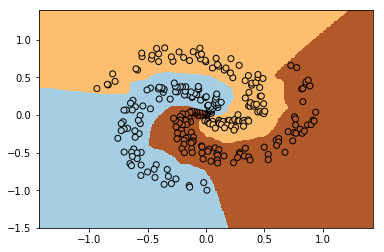

Epoch [9001/10000], Step [9000], Loss: 0.0110


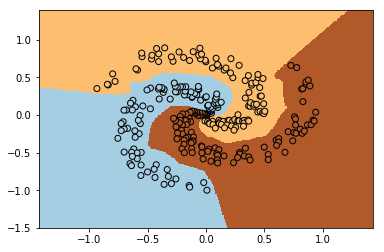

In [91]:
# Train the model
for epoch in range(10000):        
        # Forward pass
        outputs = model(torch.from_numpy(x_train.astype(np.float32)))
        loss = criterion(outputs, torch.from_numpy(y_train.astype(np.int64)))
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 1000 == 0:
            print ('Epoch [{}/{}], Step [{}], Loss: {:.4f}' 
                   .format(epoch+1, 10000, epoch, loss.item()))
            plot_decision_boundary(x_train, y_train, model)